In [1]:
"""
Probablistic Machine Learning - Task List 2
"""

%matplotlib inline
import math

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# --------- EXERCISE 1 -------------------
def draw_normal(mu, sigma, is_joint):
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma)
    y = mlab.normpdf(x, mu, sigma)
    
    if is_joint:
        kwargs = {
            'label': "JOINT u={mu}, s={sigma}".format(
                                                    mu=round(mu, 2), 
                                                    sigma=round(sigma, 2)),
            'linestyle': '-',
            'linewidth': 2.0
        }
    else:
        kwargs = {
            'label': "u={mu}, s={sigma}".format(
                                            mu=round(mu, 2), 
                                            sigma=round(sigma, 2)),
            'linestyle': '--',
            'linewidth': 1.0
        }
    plt.plot(x, y, **kwargs)
    

def draw_joint_normals(mus, sigmas):
    if not isinstance(mus, list):
        mus = [mus]
        
    if not isinstance(sigmas, list):
        sigmas = [sigmas]
    
    if len(mus) != len(sigmas):
        raise ValueError("List of mu and sigma values must be equal!")
    
    nb_normals = len(mus)
    
    joint_mu = sum(mus)
    joint_sigma = math.sqrt(sum(map(lambda s: s*s, sigmas)))
    
    for idx in range(nb_normals):
        draw_normal(mus[idx], sigmas[idx], is_joint=False)
        
    draw_normal(joint_mu, joint_sigma, is_joint=True)
    plt.legend()

In [3]:
def prepare_data_table(data):
    d = []
    
    assert len(data['mu']) == len(data['sigma'])
    nb_normals = len(data['mu'])
    
    for idx in range(nb_normals):
        normal_name = '(mu={}, sigma={})'.format(data['mu'][idx], data['sigma'][idx])
        mean = data['mu'][idx]
        var = math.pow(data['sigma'][idx], 2)
        d.append([normal_name, mean, var])
        
    joint_mu = sum(data['mu'])
    joint_sigma = math.sqrt(sum(map(lambda s: s*s, data['sigma'])))
    d.append([
        'JOINT (mu={}, sigma={})'.format(
                                    round(joint_mu, 2), 
                                    round(joint_sigma, 2)),
        joint_mu,
        joint_sigma*joint_sigma
    ])

    return pd.DataFrame(d, columns=['Normal parameters', 'Mean', 'Variance'])

,Normal parameters,Mean,Variance
0,"(mu=-5, sigma=2)",-5,4.0
1,"(mu=5, sigma=2)",5,4.0
2,"JOINT (mu=0, sigma=2.83)",0,8.0


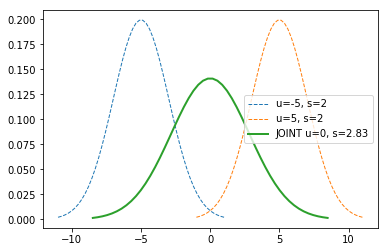

In [4]:
input_data = {
    'mu': [-5, 5],
    'sigma': [2, 2]
}

draw_joint_normals(input_data['mu'], input_data['sigma'])
prepare_data_table(input_data)

#### Exercise 2
Bernoulli scheme: $$ P_n(k) = \binom{n}{k} \; * \; p^k \; * \; q^{n-k} $$
where:<br>
$p$ - prob. of success,<br>
$q$ - prob. of failure,<br>
$n$ - number of tries,<br>
$k$ - number of successes,<br>

In this exercise we have: <br>
*success* $\to$ student gets rejected ($p = 0.99$)<br>
*failure* $\to$ student is accepted for the chosen faculty ($q = 0.01$)<br>
$n = 9$ (number of faculties)<br>
$k = 9$ (number of rejects / successes)<br>

Therefore:
$$ P_9(9) = \binom{9}{9} \; * \; 0.99^9 \; * \; 0.01^0 = 1 * 0.99^9 * 1 = 0.99^9$$ 
$$ P_9(9) = 0.99^9 = 0.9135172475$$ 

Answer: **The probability that the student could be rejected on all faculties is around 91%.**

In [5]:
def calculate_prob_all_rejected(p, n):
    """
    p - probability of getting rejected on one faculty,
    n - number of faculties
    """
    return math.pow(p, n)

PROB_REJECT_ONE = 0.99
NUM_FACULTIES = 9

prob_all_rejected = calculate_prob_all_rejected(PROB_REJECT_ONE, NUM_FACULTIES)
print('Probability that the student was rejected on all faculties:', 
      prob_all_rejected, 
      ' ->', 
      round(100*prob_all_rejected, 2), 
      '%')

Probability that the student was rejected on all faculties: 0.9135172474836408  -> 91.35 %


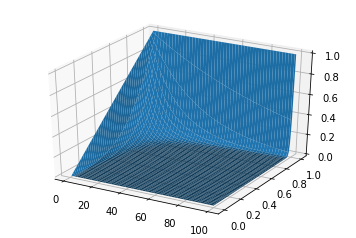

In [6]:
import itertools

from mpl_toolkits.mplot3d import Axes3D

num_fac = np.linspace(1, 100, 100)
prob_reject_one = np.linspace(0, 1, 100)

prob_reject_all = []

X, Y = np.meshgrid(num_fac, prob_reject_one)

for f, p in zip(np.ravel(X), np.ravel(Y)):
    prob_reject_all.append(calculate_prob_all_rejected(p, f))
  
Z = np.array(prob_reject_all).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

#### Exercise 3
$$ P = \binom{n}{x_1,x_2,...,x_k} * p_1^{x_1} * p_2^{x_2} * ... * p_k^{x_k} $$<br>
$$ P = \frac{n!}{x_1!x_2!...x_k!} * p_1^{x_1} * p_2^{x_2} * ... * p_k^{x_k} $$

Here:
$$x_1 = x_2 = ... = x_k = 1$$
and following property must be satified:
$$p_1 + p_2 + .... + p_k = 1$$

Therefore:
$$ P = n! * p_1 * p_2 * ... * p_k $$

In [7]:
def calculate_prob_all_rejected_multi(p, n):
    if not isinstance(p, list):
        p = [p]
        
    return math.factorial(n) * np.prod(p)


prob_all_rejected = calculate_prob_all_rejected_multi(
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2], 
    9
)
print('Probability that the student was rejected on all faculties:', 
      prob_all_rejected, 
      ' ->', 
      round(100*prob_all_rejected, 2), 
      '%')

Probability that the student was rejected on all faculties: 0.0007257600000000003  -> 0.07 %
